# GEOG5995M Final Assignment

Student ID number: 201578497

The packages required for the code were loaded.

In [30]:
# read in required packages
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable

In the first instance, the AHAH data was downloaded from <a href="#ref2">[2]</a> and loaded into a variable called *pm*.
The first couple of records of the *pm* DataFrame were viewed to find out what the data looks like and to see if there was any cleaning required, including removing unrequired columns.

In [31]:
# Use Pandas to load the pm10 data
pm = pd.read_csv('AHAH_V3_0.csv')
# Have a look at the 1st couple of rows
pm.head(2)

,lsoa11,ah3gp,ah3dent,ah3phar,ah3hosp,ah3blue,ah3gpas,ah3ffood,ah3gamb,ah3leis,...,ah3g_rnk,ah3e_rnk,ah3r_rnk,ah3h_pct,ah3g_pct,ah3e_pct,ah3r_pct,ah3ahah,ah3ahah_rn,ah3ahah_pc
0,E01000001,2.106000,0.4000,0.561600,0.492000,2.875774,0.109442,0.0000,1.3078,0.287474,...,40859,41686,41111,1,98,100,99,64.766722,41700,100
1,E01000002,3.146895,0.8875,0.879179,1.448895,2.936500,0.085310,0.2808,1.2750,0.818300,...,41483,41676,40437,8,100,100,97,65.801756,41703,100


A full list of columns was then printed, so that those that were unwanted could be identified.

In [32]:
# Check the variables contained in the AHAH data
print(pm.columns)

Index(['lsoa11', 'ah3gp', 'ah3dent', 'ah3phar', 'ah3hosp', 'ah3blue',
       'ah3gpas', 'ah3ffood', 'ah3gamb', 'ah3leis', 'ah3pubs', 'ah3tob',
       'ah3no2', 'ah3so2', 'ah3pm10', 'ah3gp_rnk', 'ah3dent_rnk',
       'ah3phar_rnk', 'ah3hosp_rnk', 'ah3leis_rnk', 'ah3gpas_rnk',
       'ah3blue_rnk', 'ah3no2_rnk', 'ah3so2_rnk', 'ah3pm10_rnk', 'ah3gamb_rnk',
       'ah3pubs_rnk', 'ah3tob_rnk', 'ah3ffood_rnk', 'ah3gp_pct', 'ah3dent_pct',
       'ah3phar_pct', 'ah3hosp_pct', 'ah3leis_pct', 'ah3gpas_pct',
       'ah3blue_pct', 'ah3no2_pct', 'ah3so2_pct', 'ah3pm10_pct', 'ah3gamb_pct',
       'ah3pubs_pct', 'ah3tob_pct', 'ah3ffood_pct', 'ah3h', 'ah3g', 'ah3e',
       'ah3r', 'ah3h_rnk', 'ah3g_rnk', 'ah3e_rnk', 'ah3r_rnk', 'ah3h_pct',
       'ah3g_pct', 'ah3e_pct', 'ah3r_pct', 'ah3ahah', 'ah3ahah_rn',
       'ah3ahah_pc'],
      dtype='object')


Only the *lsoa11* and *ah3pm10* columns were required, all others were removed, and the columns listed again to check the process worked.

In [33]:
# remove unwanted columns
pm = pm.loc[:, ['lsoa11', 'ah3pm10']]
# Check the data
print(pm.columns)

Index(['lsoa11', 'ah3pm10'], dtype='object')


A quick check was made to see if there were any missing pm10 values.

In [34]:
# See if there are any columns with null values in them
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41729 entries, 0 to 41728
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lsoa11   41729 non-null  object 
 1   ah3pm10  41729 non-null  float64
dtypes: float64(1), object(1)
memory usage: 652.1+ KB


The air quality data needed to be joined to the retail centres. The AHAH data is based on the Lower layer Super Output Areas (LSOA) so the rest of the data need to be based upon this. So that the AHAH data could be spatially visualised, the boundaries of the LSOAs were retrieved from <a href="#ref4">[4]</a> and loaded into a dataframe called *lsoa_bs* and checked.

In [35]:
# Use GeoPandas to load the lsoa geometries
lsoa_bs = gpd.read_file('LSOA_21_Boundaries.gpkg')
# Check the data has been loaded
lsoa_bs.head(2)

,LSOA21CD,LSOA21NM,GlobalID,geometry
0,E01000001,City of London 001A,{F1865556-4E62-48E3-A025-D93A40F15E46},"MULTIPOLYGON (((532105.312 182010.574, 532104...."
1,E01000002,City of London 001B,{83E78AAD-EE05-44A5-A8D3-077DE6ED4053},"MULTIPOLYGON (((532634.497 181926.016, 532572...."


The retail centre data was retrieved from <a href="#ref1">[1]</a> and loaded into a dataframe called *rc_boundaries*. The first couple of rows was viewed to make sure the data was loaded correctly and to find out what the data looked like.

In [36]:
# Use GeoPandas to load the retail centre boundaries data
rc_boundaries = gpd.read_file('Retail_Boundaries_UK.gpkg')
# Take a look at the 1st 2 rows of data to see what it looks like
rc_boundaries.head(2)

,RC_ID,RC_Name,Classification,Country,Region_NM,H3_count,Retail_N,Area_km2,geometry
0,RC_EW_1004,Melton Road; Belgrave; Leicester (East Midland...,Local Centre,England,East Midlands,19.0,141.0,0.036693,"POLYGON ((459669.060 306613.671, 459673.999 30..."
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42..."


So that the retail centres geometry column could be easily identified in the future, it was renamed to *rc_geometry* and checked.

In [37]:
# rename (geometry to rc_geometry)
rc_boundaries = rc_boundaries.rename(columns = {'geometry':'rc_geometry'})
# Print the column names
print(rc_boundaries.columns)

Index(['RC_ID', 'RC_Name', 'Classification', 'Country', 'Region_NM',
       'H3_count', 'Retail_N', 'Area_km2', 'rc_geometry'],
      dtype='object')


They were then filtered into a new dataframe called *y_rcbs*, which contained only those in the study area (*Region_NM*) of *"Yorkshire and The Humber"*. The original dataframe was deleted to save memory space and the results were checked for validity and missing values. The new dataframe records were checked and the data types looked at.

In [38]:
# Filter the retail centre to get only those from Yorkshire and the Humber and remove the original dataframe to save space.
y_rcbs = rc_boundaries.loc[rc_boundaries['Region_NM'] == 'Yorkshire and The Humber']
del rc_boundaries
# View the 1st 2 records
y_rcbs.head(2)

,RC_ID,RC_Name,Classification,Country,Region_NM,H3_count,Retail_N,Area_km2,rc_geometry
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42..."
24,RC_EW_113,Hallgate; Cottingham; East Riding of Yorkshire...,Local Centre,England,Yorkshire and The Humber,33.0,112.0,0.062035,"POLYGON ((504360.761 432933.244, 504385.794 43..."


In [39]:
# View the columns and data types of the new retail centres boundary data
y_rcbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 582 entries, 1 to 6422
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           582 non-null    object  
 1   RC_Name         582 non-null    object  
 2   Classification  582 non-null    object  
 3   Country         582 non-null    object  
 4   Region_NM       582 non-null    object  
 5   H3_count        582 non-null    float64 
 6   Retail_N        582 non-null    float64 
 7   Area_km2        582 non-null    float64 
 8   rc_geometry     582 non-null    geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 45.5+ KB


So that the *lsoa_bs* and *y_rcbs* data could be linked through intersecting geometries, the geometry column in *lsoa_bs* was copied to a new column called *saved_geom* so that the original remained and the new one could be processed and was again checked.

In [40]:
# Make a copy of the geometry column
lsoa_bs['saved_geom'] = lsoa_bs.geometry
# Check the data types of the dataframe
lsoa_bs.info(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LSOA21CD    35672 non-null  object  
 1   LSOA21NM    35672 non-null  object  
 2   GlobalID    35672 non-null  object  
 3   geometry    35672 non-null  geometry
 4   saved_geom  35672 non-null  geometry
dtypes: geometry(2), object(3)
memory usage: 1.4+ MB


The *saved_geom* column was then converted to a string so that the subsequent intersect function would not identify it as geometry data and also to allow it to be pulled through in the join function. This was checked using the *.info()* function.

In [41]:
# Convert the copy of the saved_geom column to a string for the moment.
lsoa_bs['saved_geom'] = lsoa_bs['saved_geom'].apply(lambda x: str(x))
# And set the geometry column
lsoa_bs = lsoa_bs.set_geometry('geometry')
# Check the data type of saved_geom has changed
lsoa_bs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LSOA21CD    35672 non-null  object  
 1   LSOA21NM    35672 non-null  object  
 2   GlobalID    35672 non-null  object  
 3   geometry    35672 non-null  geometry
 4   saved_geom  35672 non-null  object  
dtypes: geometry(1), object(4)
memory usage: 1.4+ MB


To ensure that the intersect function would work, the geometry was set to the *geometry* column in the *lsoa_bs* dataframe. The *geometry* column for the retail centre boundaries dataframe was also set to be the *rc_geometry* column.

In [42]:
# Now set the geomtry column to be used in the intersect function
lsoa_bs = lsoa_bs.set_geometry('geometry')
# Check the data type
lsoa_bs.info()
# Set the geometry column for the y_rcbs dataframe
y_rcbs = y_rcbs.set_geometry('rc_geometry')
# CHeck to see if the geomtry column has been set
y_rcbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LSOA21CD    35672 non-null  object  
 1   LSOA21NM    35672 non-null  object  
 2   GlobalID    35672 non-null  object  
 3   geometry    35672 non-null  geometry
 4   saved_geom  35672 non-null  object  
dtypes: geometry(1), object(4)
memory usage: 1.4+ MB
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 582 entries, 1 to 6422
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           582 non-null    object  
 1   RC_Name         582 non-null    object  
 2   Classification  582 non-null    object  
 3   Country         582 non-null    object  
 4   Region_NM       582 non-null    object  
 5   H3_count        582 non-null    float64 
 6   Retail_N        582 non-null    float64 
 7   Area_km2  

The join function was used to find all the LSOA polygons that intersected with the retail centre boundary polygons. The resulting data, which included all the retail centre data and the additional columns from the LSOA data (*LSOA21CD* and *saved_geom*) was applied to a new dataframe called *intersected*, and finally, checked.

In [43]:
# Now do the intersect calculation
# Create a dataframe called intersected, and join the lsoa_bs data to the y_rcbs data by intersecting the geometries
# as previously set
intersected = gpd.sjoin(y_rcbs, lsoa_bs[['geometry', 'LSOA21CD', 'saved_geom']],
                        how='left',
                        predicate='intersects'
                       )

intersected.head(2)

,RC_ID,RC_Name,Classification,Country,Region_NM,H3_count,Retail_N,Area_km2,rc_geometry,index_right,LSOA21CD,saved_geom
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",12241,E01012889,MULTIPOLYGON (((508005.5939999996 428179.71000...
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",33462,E01035468,MULTIPOLYGON (((507320.80200000014 428138.7780...


In [44]:
# Check the new dataframe datatypes and columns
intersected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1466 entries, 1 to 6422
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1466 non-null   object  
 1   RC_Name         1466 non-null   object  
 2   Classification  1466 non-null   object  
 3   Country         1466 non-null   object  
 4   Region_NM       1466 non-null   object  
 5   H3_count        1466 non-null   float64 
 6   Retail_N        1466 non-null   float64 
 7   Area_km2        1466 non-null   float64 
 8   rc_geometry     1466 non-null   geometry
 9   index_right     1466 non-null   int64   
 10  LSOA21CD        1466 non-null   object  
 11  saved_geom      1466 non-null   object  
dtypes: float64(3), geometry(1), int64(1), object(7)
memory usage: 148.9+ KB


Because each retail centre could potentially intersect with multiple LSOAs, each time that this happened, the join function would append a relevant row in the dataframe to reflect this. This increased the number of rows from 582 to 1466.

Because the *saved_geom* column was still as JSON object data type, it needed to be converted to a geometry data type (python dictionary). Converting this from JSON data to something that could be recognised as spatial data was done by using the *.apply(loads)* function. It was then able to be set as the geometry column. This was checked to make sure that the *intersected* dataframe contained two geometry columns for use in spatial visualisations.

In [45]:
# Convert the saved_geom column
intersected['saved_geom'] = intersected['saved_geom'].apply(loads)
# Make the saved_geom column a geometry type
intersected = intersected.set_geometry('saved_geom')
# CHeck this worked
intersected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1466 entries, 1 to 6422
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1466 non-null   object  
 1   RC_Name         1466 non-null   object  
 2   Classification  1466 non-null   object  
 3   Country         1466 non-null   object  
 4   Region_NM       1466 non-null   object  
 5   H3_count        1466 non-null   float64 
 6   Retail_N        1466 non-null   float64 
 7   Area_km2        1466 non-null   float64 
 8   rc_geometry     1466 non-null   geometry
 9   index_right     1466 non-null   int64   
 10  LSOA21CD        1466 non-null   object  
 11  saved_geom      1466 non-null   geometry
dtypes: float64(3), geometry(2), int64(1), object(6)
memory usage: 148.9+ KB


The *saved_geom* column was renamed to something more meaningful (*lsoa_geometry*) and checked.

In [46]:
# rename (saved_geom to lsoa_geometry)
intersected = intersected.rename(columns = {'saved_geom':'lsoa_geometry'})
# Check the data types
intersected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1466 entries, 1 to 6422
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1466 non-null   object  
 1   RC_Name         1466 non-null   object  
 2   Classification  1466 non-null   object  
 3   Country         1466 non-null   object  
 4   Region_NM       1466 non-null   object  
 5   H3_count        1466 non-null   float64 
 6   Retail_N        1466 non-null   float64 
 7   Area_km2        1466 non-null   float64 
 8   rc_geometry     1466 non-null   geometry
 9   index_right     1466 non-null   int64   
 10  LSOA21CD        1466 non-null   object  
 11  lsoa_geometry   1466 non-null   geometry
dtypes: float64(3), geometry(2), int64(1), object(6)
memory usage: 148.9+ KB


Once the retail centres and LSOA geometries intersections had been calculated, the pm10 data needed to be attached to each LSOA. Because the pm10 data was already attached to a 2011 LSOA, it needed to be attached to some lookup data that would provide the link between the LSOA11 and LSOA21 codes. This lookup data was retrieved from <a href="#ref5">[5]</a> and loaded to the environment and checked.

In [47]:
# Load the lsoa_11_21 data
lsoa_11_21 = pd.read_csv('LSOA11_to_LSOA21.csv')
# Check the data out
lsoa_11_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35796 entries, 0 to 35795
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA11CD  35796 non-null  object
 1   LSOA11NM  35796 non-null  object
 2   LSOA21CD  35796 non-null  object
 3   LSOA21NM  35796 non-null  object
 4   CHGIND    35796 non-null  object
 5   LAD22CD   35796 non-null  object
 6   LAD22NM   35796 non-null  object
 7   LAD22NMW  1940 non-null   object
 8   ObjectId  35796 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


The LSOA11CD code could now be joined to the *intersected* dataframe using a 'left' join that would maintain the data in the *intersected* dataframe and append the LSOA11CD to it.

In [48]:
# Join the LSOA11CD to the intersected dataframe
# Join the LSOA21CD from the lsoa_11_21 dataframe to the intersected dataframe, keeping the lsoa_11_21 data, using the 
# LSOA21CD as the lookup value
intersected = intersected.merge(lsoa_11_21[['LSOA11CD', 'LSOA21CD']],
                      left_on='LSOA21CD',
                      right_on='LSOA21CD',
                      how = 'left'
                     )
# CHeck this worked
intersected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1482 non-null   object  
 1   RC_Name         1482 non-null   object  
 2   Classification  1482 non-null   object  
 3   Country         1482 non-null   object  
 4   Region_NM       1482 non-null   object  
 5   H3_count        1482 non-null   float64 
 6   Retail_N        1482 non-null   float64 
 7   Area_km2        1482 non-null   float64 
 8   rc_geometry     1482 non-null   geometry
 9   index_right     1482 non-null   int64   
 10  LSOA21CD        1482 non-null   object  
 11  lsoa_geometry   1482 non-null   geometry
 12  LSOA11CD        1482 non-null   object  
dtypes: float64(3), geometry(2), int64(1), object(7)
memory usage: 150.6+ KB


Because some of the LSOA21 boundary codes may be linked to multiple LSOA11 codes, the join would append additional columns to the dataframe to reflect this, therefore increasing the number of rows. The final join was carried out to attach the pm10 (*ah3pm10*) data to the relevant LSOA, using the LSOA11 code.

In [49]:
# Add the pm10 value to the intersected dataframe
# Join the ah3pm10 column to the inersected datafrane using the LSOA11CD and the matching lsoa11 columns
intersected = intersected.merge(pm[['lsoa11', 'ah3pm10']],
                      left_on='LSOA11CD',
                      right_on='lsoa11',
                      how = 'left'
                     )
# CHeck this worked
intersected.info()
# View the 1st 2 records to make sure
intersected.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1482 non-null   object  
 1   RC_Name         1482 non-null   object  
 2   Classification  1482 non-null   object  
 3   Country         1482 non-null   object  
 4   Region_NM       1482 non-null   object  
 5   H3_count        1482 non-null   float64 
 6   Retail_N        1482 non-null   float64 
 7   Area_km2        1482 non-null   float64 
 8   rc_geometry     1482 non-null   geometry
 9   index_right     1482 non-null   int64   
 10  LSOA21CD        1482 non-null   object  
 11  lsoa_geometry   1482 non-null   geometry
 12  LSOA11CD        1482 non-null   object  
 13  lsoa11          1482 non-null   object  
 14  ah3pm10         1482 non-null   float64 
dtypes: float64(4), geometry(2), int64(1), object(8)
memory usage: 173.8+ KB


,RC_ID,RC_Name,Classification,Country,Region_NM,H3_count,Retail_N,Area_km2,rc_geometry,index_right,LSOA21CD,lsoa_geometry,LSOA11CD,lsoa11,ah3pm10
0,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",12241,E01012889,"MULTIPOLYGON (((508005.594 428179.710, 507961....",E01012889,E01012889,14.776606
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",33462,E01035468,"MULTIPOLYGON (((507320.802 428138.778, 507197....",E01033110,E01033110,15.287920


A check to find the number of unique retail centres (582) in the data was done, so that the subsequent step could be checked against this.

In [50]:
# Create a new dataframe of the RC_ID's  that counts the unique RC_ID's  
unique_rcs = intersected[['RC_ID']].groupby('RC_ID').nunique()
# Check the information for this so the number of rows can be seen
unique_rcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, RC_EW_100 to RC_EW_99
Empty DataFrame


The final dataframe had the retail centres data for Yorkshire and The Humber, the LSOAs that intersected with the boundaries of each retail centre, and the pm10 data for each LSOA.

The average (mean) pm10 value for each retail centre could then be calculated through the *.groupby()* function in which it would sum the pm10 values for each retail centre (*RC_ID*) and divide the result by the number of retail centres in the calculation. Mean values were added to a new dataframe called *mean_values* which contained the RC_ID and the calculated mean, which was then checked for validity


In [51]:
# Calculate the mean values
mean_values = intersected.groupby('RC_ID')['ah3pm10'].mean().reset_index()
# Check the number of rows 
mean_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RC_ID    582 non-null    object 
 1   ah3pm10  582 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.2+ KB


The calculated mean values were then added to the intersected dataframe based on the retail centre id (*RC_ID*).

In [52]:
# Join the mean values data to the intersected dataframe using the RC_ID as the lookup value, making 
# sure to rename the mean values column so it can be identified as the mean value
intersected = intersected.merge(mean_values,
                                on='RC_ID',
                                suffixes=('', '_mean')
                               )
# Check this worked
intersected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RC_ID           1482 non-null   object  
 1   RC_Name         1482 non-null   object  
 2   Classification  1482 non-null   object  
 3   Country         1482 non-null   object  
 4   Region_NM       1482 non-null   object  
 5   H3_count        1482 non-null   float64 
 6   Retail_N        1482 non-null   float64 
 7   Area_km2        1482 non-null   float64 
 8   rc_geometry     1482 non-null   geometry
 9   index_right     1482 non-null   int64   
 10  LSOA21CD        1482 non-null   object  
 11  lsoa_geometry   1482 non-null   geometry
 12  LSOA11CD        1482 non-null   object  
 13  lsoa11          1482 non-null   object  
 14  ah3pm10         1482 non-null   float64 
 15  ah3pm10_mean    1482 non-null   float64 
dtypes: float64(5), geometry(2), int64(1), object(8)
memory usage

The column holding the mean pm10 value was renamed.

In [53]:
# Rename the pm10 column to something sensible
intersected = intersected.rename(columns = {'ah3pm10_mean':'pm10_mean'})
# CHeck the 1st 2 rows
intersected.head(2)

,RC_ID,RC_Name,Classification,Country,Region_NM,H3_count,Retail_N,Area_km2,rc_geometry,index_right,LSOA21CD,lsoa_geometry,LSOA11CD,lsoa11,ah3pm10,pm10_mean
0,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",12241,E01012889,"MULTIPOLYGON (((508005.594 428179.710, 507961....",E01012889,E01012889,14.776606,15.029212
1,RC_EW_101,Hessle Road; Dairycoates; City of Kingston upo...,District Centre,England,Yorkshire and The Humber,131.0,252.0,0.245969,"POLYGON ((507139.480 427542.820, 507119.354 42...",33462,E01035468,"MULTIPOLYGON (((507320.802 428138.778, 507197....",E01033110,E01033110,15.287920,15.029212


An Ordinary Least Squares (OLS) regression model was run to find out if the area of the retail centres or the number of units contained in them was a significant predictor of air quality.

In [54]:
# Define the response/dependent variable
y = intersected['pm10_mean']

# Define the predictor/independent variables
x = intersected[['H3_count', 'Area_km2']]

# Add a constant to predictor variables to remove bias
x = sm.add_constant(x)

# Fit a linear OLS regression model
model = sm.OLS(y, x).fit()

# Print the summary of significance indicators
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pm10_mean   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.478
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0843
Time:                        13:39:09   Log-Likelihood:                -2673.8
No. Observations:                1482   AIC:                             5354.
Df Residuals:                    1479   BIC:                             5370.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9805      0.046    304.663      0.0

The OLS model shows that through the R-squared value (0.003), the model is not a good fit for the data. The P>|t| values show insignificance at α = 0.05, with *H3_count* at 0.126 and *Area_km2* at 0.130. This suggests that there are more important factors driving the level of pm10 values which are not represented in the data. To try to understand this better, the data was plotted spatially.

To start with, a lineplot was produced to show the mean pm10 values broken down by retail centre classification.

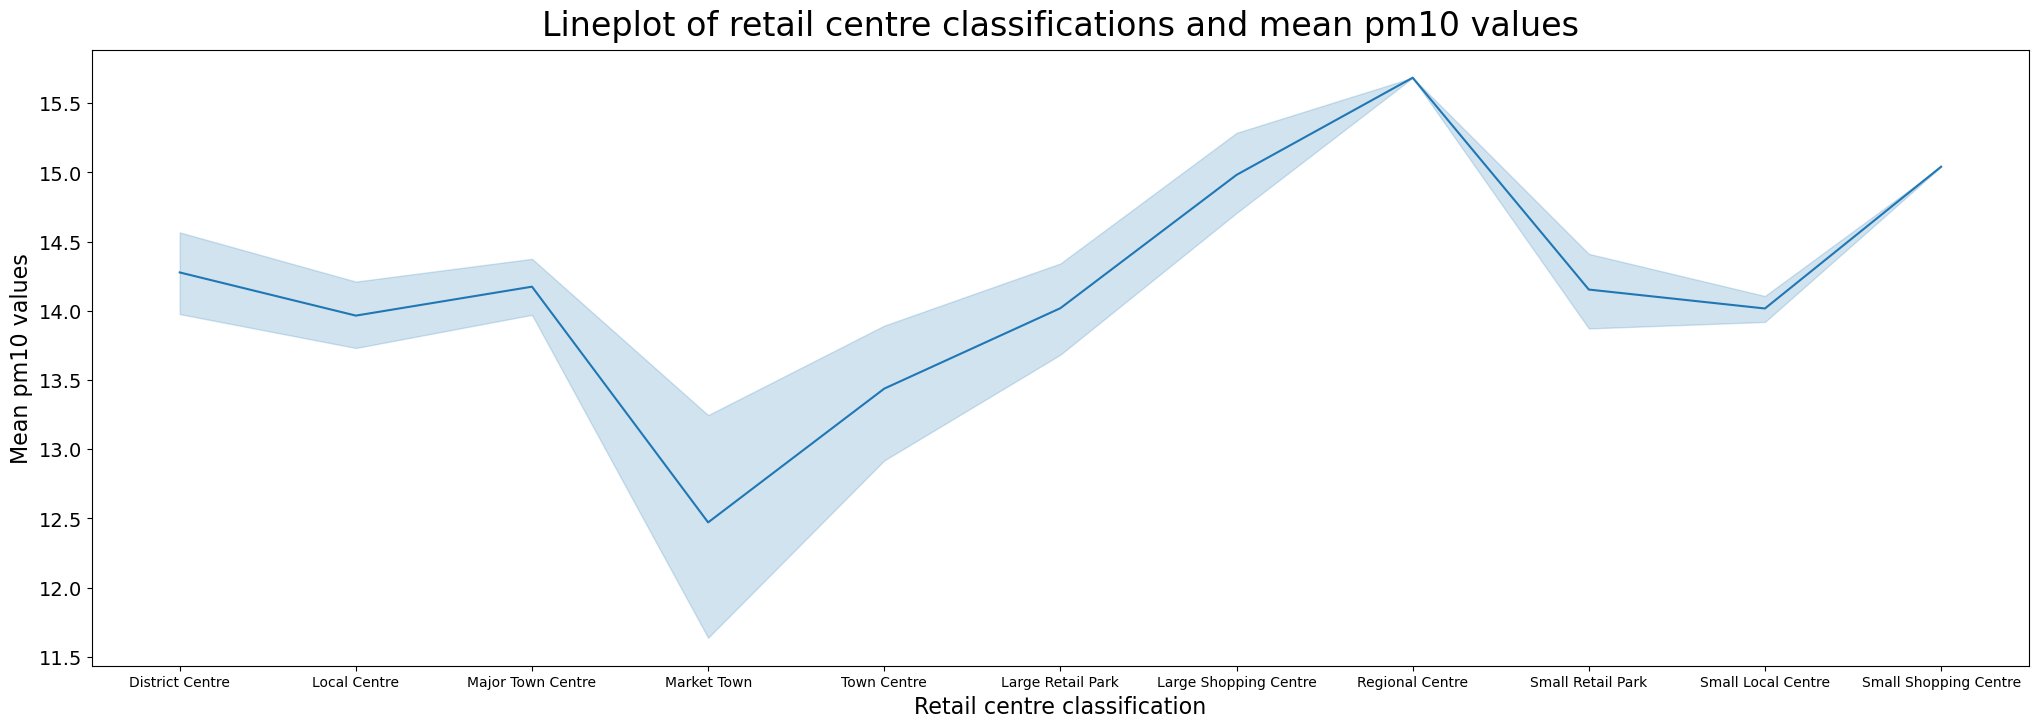

In [55]:
# Plot a line plot for the the retail centres classifications mean pm10 values
# Set the figure size
plt.figure(figsize=(25,8))
# The plot data to be used
sns.lineplot(intersected,
# The x axis
             x='Classification',
# The y axis
             y='pm10_mean'
            );
# Set the overall title of the plot
plt.title('Lineplot of retail centre classifications and mean pm10 values',
# Set the font size of the title
          fontsize = 24,
# set the position of the title
          y = 1.01
         )
# Set the x and y axis labels and font sizes for each
plt.xlabel('Retail centre classification', fontsize=16)
plt.ylabel('Mean pm10 values', fontsize=16);
# Edit the axis tick parameter 
plt.tick_params(axis='y', which='major', labelsize=14);

The lineplot shows the classification with the lowest mean pm10 data to be "Market Towns" and displays the largest variation in the 95% confidence interval, so to see whether there is a pattern to their geographical locations, they needed to be visualised in other ways.

Because there are 11 retail centre classifications, and many of the colour palettes available contain fewer than this, a new colour palette needed to be defined. The colours were chosen to be as accessible to as many people as possible, and closely resembled the *'colorblind'* palette.

In [56]:
# Define the color palette
my_palette = ['#404040', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#999999', '#F781BF', '#6C71C4']

To better visualise mean pm10 distributions for each classification of retail centre from the lineplot, a violinplot was produced to show the density and their ranges. This should be used by policy makers to get en ooverall picture of the sorts of retail centre and the air quality of each.

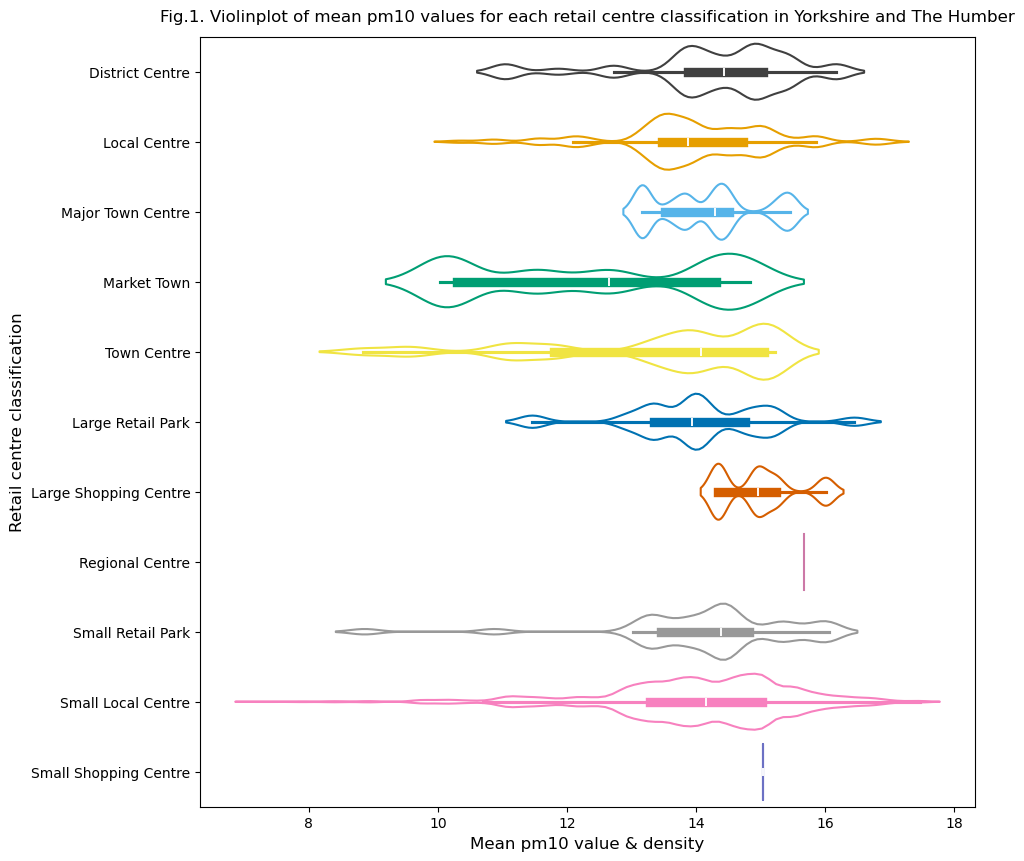

In [57]:
# Set the plot figure size
plt.figure(figsize=(10, 10))

# Define the type of plot
ax = sns.violinplot(
# Define the dataframe to be used 
    data=intersected,
# Define the x and y axis data
    x="pm10_mean",
    y='Classification',
# Define which category to base the different colours upon
    hue='Classification',
# Define the colour palette to be used
    palette=my_palette,
# Set the number of bins to be used
    bw_adjust=.4,
# Set the fill to false to make the contents more viisible
    fill = False
)

# Set the x and y axis label texts and font sizes for each
plt.xlabel('Mean pm10 value & density', fontsize=12)
plt.ylabel('Retail centre classification', fontsize=12)

# Set the overall title of the final non-spatial plot
plt.title('Fig.1. Violinplot of mean pm10 values for each retail centre classification in Yorkshire and The Humber',
# Set the fontsize of the title
          fontsize = 12,
# Set the location of the title above the plot on the y axis 
          y=1.009
         )
# Display the plot
plt.show()

Fig.1. was plotted using the newly created colour scheme due to the number of classifications. A violin plot was chosen to show as much information as possible, including the mean (white bar in the middle of each), interquartile range (the solid bar either side of the mean), and the distribution of the values, including the density of values.

It clearly showed that *'Market Towns'* had the lowest mean with no outliers. With regards to outliers, the 'Small Local Centre' classification showed a very wide range of pm10 mean values, with outliers that displayed a very low pm10 mean. Small centres and regional shopping centres displayed relatively high mean pm10 values with little or no variation in their distribution.

So that the data could be visualised spatially, LSOA boundaries for the Yorkshire and The Humber study area were retrieved from (CITE) and loaded. These were plotted as a single geometry to outline the study area.

In [ ]:
# Load all the Yorkshire and Humber LSOAs so that the study area can be mapped.
yh_lsoas = gpd.read_file("yh_lsoa_2021.shp")
# Load the library and functions to be used
from shapely.ops import unary_union
# Join the LSOAs into a single polygon geometry
merged_geometry = unary_union(yh_lsoas['geometry'])
# create a new geodataframe from this geometry, setting the geometry column
merged_lsoas = gpd.GeoDataFrame(geometry=[merged_geometry])

In [ ]:
# Plot the study are as a single shape to highlight the study are and
# to make it clear it's geography

# Set the number of subplots
fig, ax = plt.subplots(1,1)
# Set the size of the overall figure
fig.set_size_inches(36,18)

# Set the plot title and fontsize
plt.title("Map of the study area", fontsize = 24)

# Plot the merged_lsoas
merged_lsoas.plot(
# Attaach it to ax
    ax = ax,
# Set the fill colour to none so only the border is visible
    color = "none",
# Set the linewidth of the border to highlight it
    linewidth = 1,
# Set the outer border to darkred
    edgecolor = "darkred"
    )

# Add a basemap
ctx.add_basemap(
# add it ax
   ax,
# set the zoom level to make the place names as visible as possible
    zoom = 9,
# Set the CRS of the map
    crs='EPSG:27700',
# Set the map type
    source=ctx.providers.CartoDB.Positron
);

# Remove the axis labels
ax.set_axis_off()

# Show the plot
plt.show()

Ideally an interactive map of the *Classification* and *pm10_mean* variables would allow the user to select which layers were visible for comparative purposes, but due to issues with the available memory this was not possible. Therefore, the two plots were faceted so to allow the classifications and mean pm10 data to be viewed side-by-side and referenced against each other. This plot should be used by policy makers to allow further focus on policy interventions in retail centres with the worst air quality. 

In [ ]:
# Create a ListedColormap from the custom palette
my_cmap = mcolors.ListedColormap(my_palette)

# Create subplots with adjusted aspect ratio
fig, axes = plt.subplots(1, 2, figsize=(36, 18), gridspec_kw={'width_ratios': [1, 1.0372]})

# 1st subplot
# Se the blank canvas and choose the 1st index number [0]
ax = axes[0]
# Set the geometry column of the dataframe to be used
intersected = intersected.set_geometry('lsoa_geometry')

# Plot the Classification from intersected
intersected.plot(
# Attach it to ax
    ax=ax,
# Set the data column to be used
    column=intersected['Classification'],
# Set the colour scheme to be the one created earlier
    cmap=my_cmap,
# Make the plot for categorical data (Classifications)
    categorical=True,
# Set the legend to true to get the classifications
    legend=True,
# Set the font size of the legend itemms
    legend_kwds={'fontsize': 15}
)

# Add the lsoas to this 1st plot
yh_lsoas.plot(
# Attach it to ax
    ax=ax,
# Se the fill colour to none, leaving the borders only
    color="none",
# Se the border line width to something small to make them distinguishable as possible
    linewidth=0.1
)

# Add a basemap to this 1st plot
ctx.add_basemap(
# attach it to ax
    ax,
# Set the zoom as before
    zoom=9,
# Set the CRS as before
    crs='EPSG:27700',
# Choose the map type 
    source=ctx.providers.CartoDB.Positron
)

# Remove the axis ticks that show the lon and lat
ax.set_axis_off()

# Make the second subplot with an adjusted aspect ratio
# Set the ax index to plot in
ax = axes[1]
# Set the geometry column
intersected = intersected.set_geometry('lsoa_geometry')

# Plot the data
intersected.plot(
# Attach it to ax
    ax=ax,
# Choose the data column to plot
    column='pm10_mean',
# Set the data type to continuous
    categorical=False,
# Remove the legend
    legend=False,
# Set the opacity to allow the use to see the map underneath
    alpha=0.7,
# Set the fill colour for the plotted data values
    cmap = plt.cm.get_cmap('viridis_r')
)

# Plot the lsoas again
yh_lsoas.plot(
# Attach them to this ax
    ax=ax,
# Se the fill colour to none, leaving the borders
    color="none",
# Set the linewidth of the borders
    linewidth=0.1
)

# Add the basemap fot the second plot
ctx.add_basemap(
# Attach it to ax
    ax,
# Set the zoom again
    zoom=9,
# Set the CRS
    crs='EPSG:27700',
# Choose the maptype
    source=ctx.providers.CartoDB.Positron
)

# Remove the lon and lat from the axes
ax.set_axis_off()

# Creat the colorbar for the second subplot
# Make the colour bar editable
divider = make_axes_locatable(ax)
# attach it to a variable called cax and adjust its position, size compared to the plot, and padding against the plot edge 
cax = divider.append_axes("right",
                          size="3%",
                          pad=0.1)
# Edit the contents of the colour bar
# attach the colourbar to a variable called cbar
cbar = plt.colorbar(ax.collections[0],
                    cax=cax)
# Set the label and font size of the label of the colour bar
cbar.set_label('Mean pm10 value µg/m^3',
               fontsize=20)
# Change the size of the ticks to make the visible
cbar.ax.tick_params(labelsize='x-large')

# Add overall title with adjusted y parameter, and font size
fig.suptitle("Fig.2. LSOAs with Retail Centres and PM10 Mean Values", fontsize=24, y=0.89)

# Adjust layout to tight so they appear as close as possible
plt.tight_layout()

# Show the plot
plt.show()


Ideally an interactive map of the *Classification* and *pm10_mean* variables would allow the user to select which layers were visible for comparative purposes, but due to issues with the available memory this was not possible. Therefore, the two plots were faceted to allow the classifications and pm10 data to be viewed side-by-side and referenced against each other.

Fig.2. is aimed at policy makers as a starting point on which to focus any change that would be applied to areas that could potentially be busiest, and those that show the highest levels of pollution. Addressing pollution due to traffic in these areas could help to improve the health of those shoppers visiting those areas. The spatial distribution of retail centres shows that they are clustered within more urban areas which display relatively high levels of pm10 and these areas should be the focus of these potential policy changes.

The categorical data plotted used the previously created colour scheme and showed that classification was relatively uninformative with regards to the levels of pm10 in an area. A legend was included for reference. Pm10 means were shown using a reversed viridis colour scheme which is a good choice for those with many types of colour-blindness. It was reversed to show areas with low pm10 means as lighter and higher pm10 means as darker as this appeared to be more suitable for this data. A colour scale bar was included to show the levels and range of values included in the plot.


#### References

<p><a href="https://data.cdrc.ac.uk/dataset/retail-centre-boundaries-and-open-indicators">[1]</a> Consumer Data Research Centre 2022. Retail Centre Boundaries. [Accessed 6 March 2023]. Available from: https://data.cdrc.ac.uk/dataset/retail-centre-boundaries-and-open-indicators/resource/retail-centre-boundaries.</p>

<p><a href="https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah">[2]</a> Daras, K., Green, M.A., Davies, A., Singleton, A. and Barr, B. 2019. Access to Healthy Assets and Hazards (AHAH) - Updated version 2017. , 300871 Bytes.</p>

<p><a href="https://opendatacommunities.org/atlas/resource?uri=http%3A%2F%2Fopendatacommunities.org%2Fid%2Fgeography%2Fadministration%2Frgn%2FE12000003">[3]</a> Department for Levelling Up, Housing and Communities n.d. DLUHC Open Data | Yorkshire and The Humber. [Accessed 2 December 2023]. Available from: https://opendatacommunities.org/atlas/resource?uri=http%3A%2F%2Fopendatacommunities.org%2Fid%2Fgeography%2Fadministration%2Frgn%2FE12000003.</p>

<p><a href="https://www.data.gov.uk/dataset/fa883558-22fb-4a1a-8529-cffdee47d500/lower-layer-super-output-area-lsoa-boundaries">[4]</a> Office for National Statistics 2016. Lower Layer Super Output Area (LSOA) boundaries. [Accessed 2 December 2023]. Available from: https://www.data.gov.uk/dataset/fa883558-22fb-4a1a-8529-cffdee47d500/lower-layer-super-output-area-lsoa-boundaries </p>

<p><a href="https://geoportal.statistics.gov.uk/datasets/e99a92fb7607495689f2eeeab8108fd6/explore">[5]</a> Open Geography Portal 2022. LSOA (Dec 2021) Boundaries Full Clipped EW (BFC). [Accessed 6 March 2023]. Available from: https://geoportal.statistics.gov.uk/datasets/ons::lsoa-dec-2021-boundaries-full-clipped-ew-bfc/explore?location=53.943524,-0.982810,10.84. </p>